# Introduction

This program solves the problem of $n$ coupled masses coupled by identical springs, with arbitrary starting positions and zero initial velocity. The displacements are transverse to the equilibrium line of masses and are assumed to be small. The solution is obtained by decomposing into normal modes, not by approximate integration of the equations of motion using Euler or RK.

In addition to static plots of $y(t)$ for the first few masses, an animation of the entire system can be shown as it evolves in time. 

See the comments in the code for notes on the calculation.

<IPython.core.display.Javascript object>


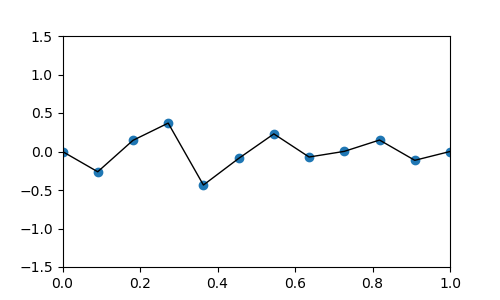

In [5]:
#Python "fill in" code assignment from PHYS 2200 
#Meant to be ran with Andaconda Navigator's Jupyter Lab 
#Fall 2019
#Shows an animation of "masses" on springs using Matrices and Eigenvectors (aka using math)

from numpy import *
from numpy import linalg as la
import matplotlib.pyplot as plt

# This is the function which does the animation:
from matplotlib.animation import FuncAnimation

# This is needed to make the animation work in the Jupyter notebook environment:
%matplotlib notebook

# Set number of masses:
n = 10

# Set initial conditions (initial velocity is zero for now):
y0 = zeros(n)

y0[0] = 1
y0[1] = -0.5

# plot_type can be 'static' or 'anim'
plot_type = 'anim'

# Construct the coupling matrix:
M = zeros(shape=(n,n))

for i in range(n):
    for j in range(n):
        if (i == j):
            M[i,j] = 2
        elif (i == j-1):
            M[i,j] = -1
        elif (i == j+1):
            M[i,j] = -1

# Find eigenvectors and -values. Note that the function la.eig() automatically normaliizes the 
# eigenvectors to unit length, so these are just as we want them.
eValues, eVectors = la.eig(M)

# If you want to see that the vectors are normalized, you can uncomment the following lines.
# The function la.norm() evaluates the norm:
#for i in range(n):
#    print("Norm of eigenvector", i+1, "is", la.norm(eVectors[:,i]))

# It is not neccessary that the eigenvalues be sorted from smallest to largest; everything below
# would work fine without it. But it's nice if you want to plot them. So this bit of code sorts
# the eigenvalues, then reorders the eigenvectors the same way so that they still match up:
idx = eValues.argsort()[::1]
eValues = eValues[idx]
eVectors = eVectors[:,idx]

# If you want to look at the first few eigenvectors, uncomment these lines:
#plt.plot(eVectors[:,0], 'b-')
#plt.plot(eVectors[:,1], 'r--')
#if n > 2:
#    plt.plot(eVectors[:,2], 'm-.')

# Now back to the physics problem! Here we calculate the expansion coefficients of the initial
# displacement vector in terms of the normal mode eigenvectors. The function dot() evaluates the 
# dot product of two vectors.
a = zeros(n)
for i in range(n):
    a[i] = dot(y0, eVectors[:,i])

# Now set up for making plots of x versus t.
tmin = 0
tmax = 10
nsteps = 100

# Here is an array of t values from tmin to tmax:
t = linspace(tmin, tmax, nsteps)

# ...and an array of x values from 0 to 1 (the length of the system, an arbitrary value).
# The extra points are just the fake end masses that are fixed in position at y=0.
x = linspace(0, 1, n+2)

# This array holds the displacement values for each x (first argument) and t (second argument). 
y = zeros(shape=(n+2, nsteps))

# Now we evaluate the solution for the specified values of x and t.
# Loop over the times, starting with zero. Note that tt is an index (0,1,2,...), so the actual
# value of t in each step is t[tt].
for tt in range (nsteps):
    # Then loop over x values from 1 to n. The fake left and right masses (0 and n+1) are not
    # touched; they are initialized to zero above and just stay that way.
    for i in range (1,n+1):
        # Finally, loop over the normal modes (r runs from 0 to n-1) to build up the solution:
        for r in range(n):
            # Each y value is initialized to zero above, and here we just add in the contribution
            # from each normal mode. There is a slightly tricky bit here in that the y array has
            # an extra fake end mass for i=0. So the 0 element of the eigenvector actually 
            # corresponds to the 1 element of y; the two arrays are offset:
            y[i,tt] += a[r]*eVectors[i-1,r]*cos(eValues[r]*t[tt])

# And now we can plot whatever we want...

# In this case, just plot y[t] for the two left-most masses (i=1 and i=2):
if plot_type == 'static':
    plt.plot(t, y[1,:])
    plt.plot(t, y[2,:],'r') # The 'r' makes this one a red line

# In this case, animate the whole system. This may look a little cryptic to you; don't worry about
# that :-).
if plot_type == 'anim':
    # Set up the plot area:
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.set(xlim=(0, 1), ylim=(-1.5, 1.5))
    
    # line shows the lines connecting the points; scat shows circles at the locations
    # of the masses:
    line = ax.plot(x, y[:, 0], color='k', lw=1)[0]
    scat = ax.scatter(x[:], y[:, 0])

    # This function defines what we want to animate. Basically every new frame in the 
    # animation corresponds to a new value of the second argument of y, i.e., the time.
    def animate(i):
        line.set_ydata(y[:, i])
        y_i = y[:, i]
        scat.set_offsets(c_[x[:], y_i])

    # This is the function that actually produces the animation. If you set repeat=True, 
    # it will automatically loop from the beginning.
    anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1, repeat=False)
    fig.show()